In [4]:
#<都江堰-青城山汽车1日游>
#http://www.tuniu.com/tour/210451431

In [6]:
import requests
from bs4 import BeautifulSoup
def downloadHtml(url):
    try:
        r = requests.get(url,timeout = 10)
        r.raise_for_status() # 如果状态不是200，引发异常
        r.encoding = r.apparent_encoding
        return r.text
    except:
        return "下载网页出现异常"

# 利用ajax异步加载数据技术，爬取xhr中的数据，从而获取对该旅游产品的全部183页评论及其满意度

### ajax参考：https://blog.csdn.net/qq_29245097/article/details/51804501
### xhr提取数据参考：week5课后练习xhr提取数据

# 这里数据量并不是特别大，所以可以直接运行！


In [7]:
import json
import requests
from bs4 import BeautifulSoup

comments = ''#将评论放在一起，用来分词和画词云
text=[] #将评论放在list里，用来贝叶斯分类
compName=[] #提取满意度，作用同上
for n in range(183): #爬取前20页数据
    
    n=str(n)
    url = 'http://www.tuniu.com/papi/tour/comment/product?page='+n+'&productId=210451431&selectedType=0&stamp=0183578887359662661528606481577'
    r = requests.get(url)
    html = r.text
#print(html)

    book=json.loads(html)
    #print(book)
   
    for k in range(len(book['data']['list'])):
        
        comments = comments + book['data']['list'][k]['content']
        text=text+ book['data']['list'][k]['content'].split()
        
        
        
        compName=compName+ book['data']['list'][k]['compName'].split()
        #print(book['data']['list'][k]['content'])
        


In [ ]:
# 将原始数据写入txt
with open("rawdata.txt","w") as f:
        f.write(comments)

In [ ]:
len(text)

In [ ]:
len(compName)

## 可以看到所有的评论已经变成一个字符串了，但是我们发现评论中还有不少的标点符号等。这些符号对我们进行词频统计时根本没有用，因此要将它们清除.所用的方法是正则表达式。python中正则表达式是通过re模块来实现的。



In [8]:
#通过正则表达式去除掉标点符号
import re
 
pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)

In [9]:
print(cleaned_comments)

我们入住得是民俗距离宽窄巷子西安路都超近都是美食集合也很方便因为错峰出行上午去的青城山下午是都江堰晚上回来去西安路吃的老夏火锅每个人口味不一样反正我觉得挺好吃的略略略熊猫基地我们是自行游玩因为不太大一个上午就结束了不过一定得点到要不然错过熊猫吃早饭得时间然后上午太阳一出来都在睡觉了走的时候买了桥头小龙坎的火锅底料小袋大的一定要托运嗯说一下我们牛人导游吴优各方面都挺好的就是讲解语速在稍微慢一点就好了图片美食就是吴优推荐的最后就这样语无伦次得点评完了突然想加一句锦里三炮台得菠萝饭喜欢甜食得妹纸一定不要错过非常满意团餐是我在国内游玩吃得最好吃最有特色的团餐吃饭时还看到了川剧变脸总之就是很满意小蒋导游人很好为游客考虑的很周到游玩结束散团前她会跟你讲成都的一些特色小吃火锅串串香到哪里吃去哪里玩说的很详细很棒拜水都江堰问道青城山整个行程很紧凑导游小菜的讲解也很精彩一路上都在给我们介绍都江堰的原理道家的知识等中午的团餐很丰盛又有特色还有川剧变脸表演整个行程真的是纯玩无购物小菜只推荐了几个必要的交通车索道既节省体力又节约时间一整天下来累并快乐着体验非常棒第一次在途牛定旅行团先看了评价好评度很高最后决定试一次出行前导游小吴细心的叮嘱好多事宜整个旅程小吴导游都跟我们游客在一起耐心讲解很专业午饭安排的也超级好至少我这个东北人吃饭很开心时间安排的紧凑而且我最最在意的就是没有任何消费包括新型消费这个应该是所有游客都很在意的请大家放心的下单吧非常满意的一次旅途张导是非常敬业的专业水平很高把都江堰讲解得有声有色仿佛历史就在眼前还带领鼓励我们登上都江堰的最高塔玉垒阁拍全景从伟大水力工程讲到中国历史让我们感到古人的智慧午餐是我们吃过最好的饭店干净菜品即有川菜又有清淡的菜还有川剧变脸太开心了下午的青城山安排非常合理一会儿渡船一会揽车还有观光小车登到上清宫张导给我讲道家文化即看了景又感受到山的幽下次还报牛人专线跟张导走都江堰壮观青城山空气清新风景秀丽美女导游小陈热心耐心细心贴心这次出游非常开心都江堰水利工程导游先带我们走到近处分别详细介绍了宝瓶口飞沙堰鱼嘴的原理又带我们爬上玉垒阁从高处观看水利工程由于这两个景点都要爬山为了节省体力我们购买了景区内交通小陈导游没有让我们乘坐所有的交通而是给我们推荐了几个必要的每人加了元分别是都江堰登上玉垒阁的云梯青城山大门到山门的电瓶车青城山索道大大节省了体力而且还没有错

## 要进行词频统计，所以先要进行中文分词操作。在这里我使用的是结巴分词。

In [10]:
#使用结巴分词将句子分开

import jieba    #分词包
import pandas as pd  
 
segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/xt/cy3b722d5l39f253_26mc0l80000gn/T/jieba.cache
Loading model cost 0.982 seconds.
Prefix dict has been built succesfully.


## 从上图可以看到我们的数据中有“看”、“太”、“的”等虚词（停用词），而这些词在任何场景中都是高频时，并且没有实际的含义，所以我们要他们进行清除。用停等词库将没有意义的词过滤掉



In [11]:
#停等词过滤

stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

In [12]:
#词频统计
import numpy    #numpy计算包
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)

#将词频统计的结果进行排序，选取词频最高的前30个热点词汇，结果如下图所示。
words_stat[500:]



/Users/pro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,segment,计数
3834,紧张,11
3360,火锅,11
1995,尽职尽责,11
2208,强烈推荐,11
4244,规划,11
839,内容,11
1523,堵车,11
2322,快乐,11
2007,山上,11
1500,坐船,11


## 从上表中可以看出，“导游”，“好”，“讲解”，“不错”，“满意”，“合理”，“热情”等这类词汇表示了游客的主要态度，这表明，游客的体验大多数还是倾向于满意的

# python还拥有很好的数据可视化方法来体现热点词汇，这里利用wordcloud，将热点词汇以词云的方式来体现，最终的结果如下图所示。



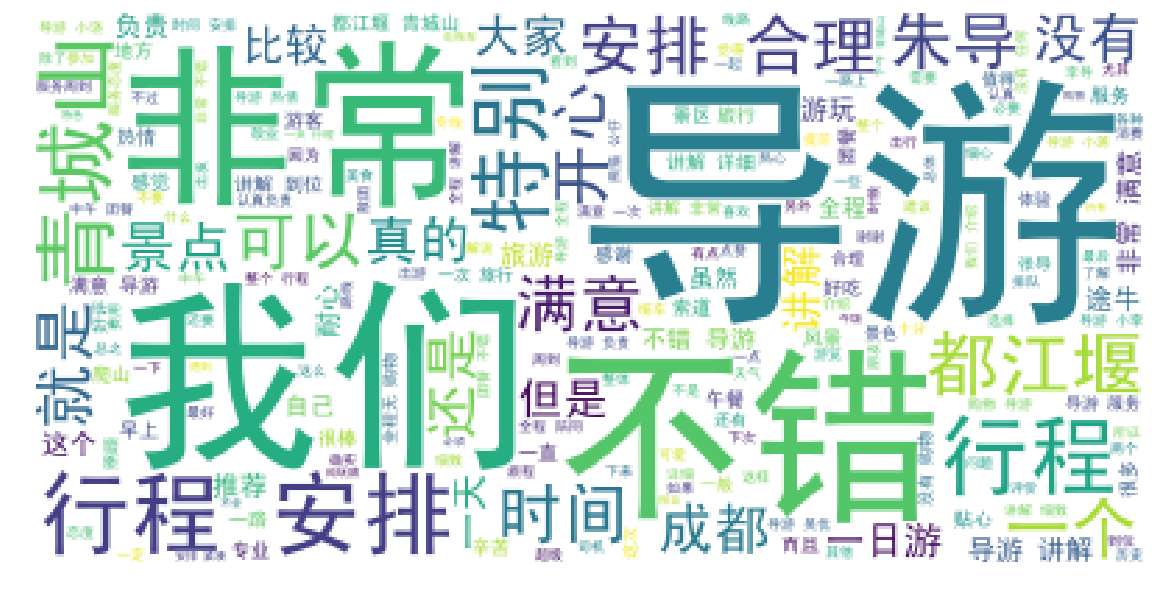

In [13]:
#用词云进行显示
import matplotlib.pyplot as plt
%matplotlib inline
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)
from wordcloud import WordCloud#词云包
 
wordcloud = WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=100).generate(' '.join([" ".join(jieba.cut(cleaned_comments))]))
#' '.join([" ".join(jieba.cut(content))])
# word_list = [" ".join(jieba.cut(content))]
# new_text = ' '.join([" ".join(jieba.cut(content))])

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 从词云所体现的主题来看，和上表中的词频统计表体现的热点还是基本吻合的。

In [ ]:
df

In [15]:
import jieba
df=pd.DataFrame(text[:1830],columns=['comment'])

# 本文的进一步改进是利用了机器学习的方法进行了旅游产品评论的情感分析，
即将每条评论作为自变量，将游客的评分作为因变量，利用朴素贝叶斯分类器将其进行分类，最终的准确率能够达到96%
说明具有很好的分类和预测效果

In [16]:
df['评分']=compName
df

,comment,评分
0,我们入住得是民俗，距离宽窄巷子、西安路都超近（都是美食～），集合也很方便，因为错峰出行，上午...,满意
1,非常满意，团餐是我在国内游玩吃得最好吃，最有特色的团餐，吃饭时还看到了川剧变脸！总之就是很满...,满意
2,拜水都江堰，问道青城山。整个行程很紧凑，导游小菜的讲解也很精彩，一路上都在给我们介绍都江堰的...,满意
3,索道，既节省体力，又节约时间。一整天下来，累并快乐着，体验非常棒！,满意
4,第一次在途牛定旅行团。先看了评价，好评度很高，最后决定试一次。出行前导游小吴细心的叮嘱好多事...,满意
5,非常满意的一次旅途！张导是非常敬业的，专业水平很高，把都江堰讲解得有声有色，仿佛历史就在眼前...,满意
6,都江堰壮观，青城山空气清新风景秀丽，美女导游小陈热心、耐心、细心、贴心！这次出游非常开心！都...,满意
7,如果没有小孟导游，你不会懂得都江堰两千多年的水利工程，是如何造福万代的！如果没有小孟导游，你...,满意
8,每次出游，我都相信途牛的品质，果然没让我失望，景点还不错，适合一日游，没事去看看山水，挺好的...,满意
9,导游从头到尾都非常负责,满意


In [17]:
#情感标注

#python的函数式编程，将满意的情感值设为1，其他的均为0
def make_label(df):
    df["sentiment"] = df["评分"].apply(lambda x: 1 if x=='满意' else 0)
    
make_label(df)

X = df[["comment"]]
y = df.sentiment

In [18]:
#切词
import jieba
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

X["cutted_comment"] = X["cutted_comment"] = X.comment.apply(chinese_word_cut)

X.head()

/Users/pro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,comment,cutted_comment
0,我们入住得是民俗，距离宽窄巷子、西安路都超近（都是美食～），集合也很方便，因为错峰出行，上午...,我们 入住 得 是 民俗 ， 距离 宽窄 巷子 、 西安 路 都 超近 （ 都 是 美食 ～...
1,非常满意，团餐是我在国内游玩吃得最好吃，最有特色的团餐，吃饭时还看到了川剧变脸！总之就是很满...,非常 满意 ， 团餐 是 我 在 国内 游玩 吃 得 最 好吃 ， 最有 特色 的 团餐 ，...
2,拜水都江堰，问道青城山。整个行程很紧凑，导游小菜的讲解也很精彩，一路上都在给我们介绍都江堰的...,拜水 都江堰 ， 问道 青城山 。 整个 行程 很 紧凑 ， 导游 小菜 的 讲解 也 很 ...
3,索道，既节省体力，又节约时间。一整天下来，累并快乐着，体验非常棒！,索道 ， 既 节省 体力 ， 又 节约 时间 。 一整天 下来 ， 累 并 快乐 着 ， 体...
4,第一次在途牛定旅行团。先看了评价，好评度很高，最后决定试一次。出行前导游小吴细心的叮嘱好多事...,第一次 在 途牛定 旅行团 。 先看 了 评价 ， 好评 度 很 高 ， 最后 决定 试 一...


In [19]:
#生成词袋矩阵
from sklearn.cross_validation import train_test_split

#将训练集和验证集以3:1的比例进行抽取
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/Users/pro/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
X_train

,comment,cutted_comment
840,导游小蒋很负责，一路上不停的给我们讲解，对于景区的一些收费项目也介绍的很清楚，哪些景点项目推...,导游 小蒋 很 负责 ， 一路上 不停 的 给 我们 讲解 ， 对于 景区 的 一些 收费 ...
1094,拜水都江堰，问道青城山！行程安排比较流畅，没有浪费时间！,拜水 都江堰 ， 问道 青城山 ！ 行程 安排 比较 流畅 ， 没有 浪费时间 ！
918,很好的体验，导游很热心，都江堰虽然看着很简单，但是缺造福千秋，青城山也很有特点，这一趟还是很值得,很 好 的 体验 ， 导游 很 热心 ， 都江堰 虽然 看着 很 简单 ， 但是 缺 造福 ...
950,这次出行从预订到成行都非常完美！感谢途牛网的袁昊经理！感谢途牛网售后的何经理！感谢旅行社的李...,这次 出行 从 预订 到 成行 都 非常 完美 ！ 感谢 途牛网 的 袁昊 经理 ！ 感谢 ...
1163,朱导人很好，有耐心，风趣，到成都之后还跟我们详细介绍了有哪些好吃的店。对景点介绍详细清楚。团...,朱导 人 很 好 ， 有 耐心 ， 风趣 ， 到 成都 之后 还 跟 我们 详细 介绍 了 ...
757,小朱导游人很好，讲解耐心，不错的一次旅游,小朱 导游 人 很 好 ， 讲解 耐心 ， 不错 的 一次 旅游
228,还不错，确实没有其它项目，导游最后带了腊肉干，自愿够买，都是看的，没啥玩儿的，景色不错,还 不错 ， 确实 没有 其它 项目 ， 导游 最后 带 了 腊肉 干 ， 自愿 够买 ， ...
1248,我们的导游小陈从上车出发至下车送行，一路景点详细讲解，热情服务关怀照顾我们一行上了年纪的老玩...,我们 的 导游 小 陈从 上车 出发 至 下车 送行 ， 一路 景点 详细 讲解 ， 热情服...
1533,我们爬上去简单一转下山就超点了,我们 爬上去 简单 一转 下山 就 超点 了
534,途牛的服务一直很好，每次出行都选择它，以后还会继续选择的！,途牛 的 服务 一直 很 好 ， 每次 出行 都 选择 它 ， 以后 还会 继续 选择 的 ！


In [21]:
len( X_test)

458

In [22]:
def get_custom_stopwords(stop_words_file):
    with open(stop_words_file,encoding = "utf-8") as f:
        stopwords = f.read()
    stopwords_list = stopwords.split('\n')
    custom_stopwords_list = [i for i in stopwords_list]
    return custom_stopwords_list

In [23]:
stopwords = get_custom_stopwords("stopwords.txt")

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=stopwords)
term_matrix = pd.DataFrame(vect.fit_transform(X_train.cutted_comment).toarray(), columns=vect.get_feature_names())
term_matrix.head()

,00,06,0638,081,10,100,101,12,120,13,...,黄伟,黄导,黄导人,黄导点,黄瓜,默认,默默,鼓励,鼾声,齐全
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
max_df = 0.8 # 在超过这一比例的文档中出现的关键词（过于平凡），去除掉
min_df = 3 # 在低于这一数量的文档中出现的关键词（过于独特），去除掉
vect = CountVectorizer(max_df = max_df,
                       min_df = min_df,
                       stop_words=stopwords)

term_matrix = pd.DataFrame(vect.fit_transform(X_train.cutted_comment).toarray(), columns=vect.get_feature_names())
term_matrix.head()

,00,10,100,12,120,15,20,30,40,50,...,饶导,饶朝敏,马马虎虎,驾驶,高处,高峰,鱼嘴,黄伟,黄导,鼓励
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 这里是利用pca主成分分析法将词频矩阵进行降维，从而找出他们的数量和分布。
## 主成分分析（Principal Component Analysis），是一种用于探索高维数据的技术。PCA通常用于高维数据集的探索与可视化。还可以用于数据压缩，数据预处理等。PCA可以把可能具有线性相关性的高维变量合成为线性无关的低维变量，称为主成分（principal components），新的低维数据集会尽可能的保留原始数据的变量，可以将高维数据集映射到低维空间的同时，尽可能的保留更多变量。

### 参考https://blog.csdn.net/lguduy/article/details/53742478；https://www.cnblogs.com/chenyaling/p/7461386.html

Text(0,0.5,'Y Label')

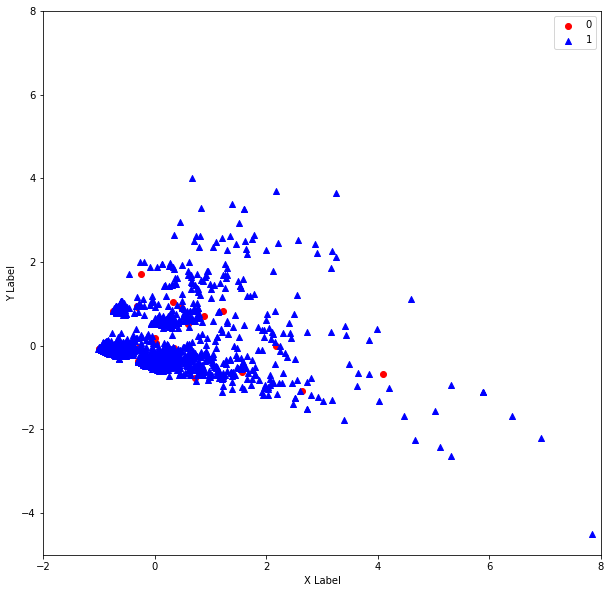

In [45]:
##将词频矩阵转化为二维数据，画图 
import numpy as np
from sklearn.decomposition import PCA

countvector=vect.fit_transform(X.cutted_comment).toarray()


#将评论中的情感，得出他们的类别和类别数量
kind = np.unique(df['sentiment'].values)


#利用pca将词频矩阵中降为两个维度，然后画图
pca = PCA(n_components=2)

newvector = pca.fit_transform(countvector)
plt.figure(figsize=(10,10))

for i,c,m in zip(range(len(kind)),['r','b'],['o','^']):
    index = df[df['sentiment']==kind[i]].index
    x = newvector[index,0]
    
    y = newvector[index,1]
    
    plt.scatter(x,y,c=c,marker=m,label=kind[i])
plt.legend()
plt.xlim(-2,8)
plt.ylim(-5,8)
plt.xlabel('X Label')
plt.ylabel('Y Label')

# 从图中我们可以看出，评论中大部分都是积极的评论，只有极少数的评论是消极的

# 接下来是利用nb,knn和kmv分别对数据进行模型拟合和评估，以找到更好预测效果的模型

### 混淆矩阵参考https://www.cnblogs.com/chenyaling/p/7461386.html

# NB 
* list1 model

In [34]:
#训练模型 nb
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(vect, nb)

#将数据集分为验证集和测试集

#在这里，我们使用交叉验证的方式，把数据切为五份，一份用来评估，其余用来训练，循环进行，
#从而提高训练模型的准确率

from sklearn.cross_validation import cross_val_score
cross_val_score(pipe, X_train.cutted_comment, y_train, cv=5, scoring='accuracy').mean()

pipe.fit(X_train.cutted_comment, y_train)


#模型评估
y_pred = pipe.predict(X_test.cutted_comment)
from sklearn import metrics
metrics.accuracy_score(y_true = y_test,y_pred = y_pred)

0.9519650655021834

In [35]:
cross_val_score(pipe, X_train.cutted_comment, y_train, cv=5, scoring='accuracy').mean()

0.9635538670575166

* list2 plot

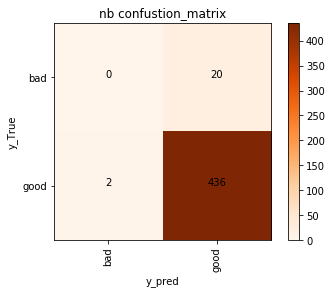

In [36]:

nb_confusion = confusion_matrix(y_test,y_pred)

plt.imshow(nb_confusion,interpolation='nearest',cmap=plt.cm.Oranges) 
plt.xlabel('y_pred')
plt.ylabel('y_True')

kind=['bad','good']

tick_marks = np.arange(len(kind))
plt.xticks(tick_marks,kind,rotation=90)
plt.yticks(tick_marks,kind)
plt.colorbar()
plt.title('nb confustion_matrix')
for i,j in itertools.product(range(len(nb_confusion)),range(len(nb_confusion))):
    plt.text(i,j,nb_confusion[j,i],
             horizontalalignment="center")

# knn
### knn 算法原理参考https://www.cnblogs.com/feffery/p/8922444.html
* list1 model

In [31]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
pipe = make_pipeline(vect,knn_clf)
pipe.fit(X_train.cutted_comment, y_train)

#模型评估
y_pred = pipe.predict(X_test.cutted_comment)
from sklearn import metrics
metrics.accuracy_score(y_true = y_test,y_pred = y_pred)

0.8995633187772926

* list2 plot

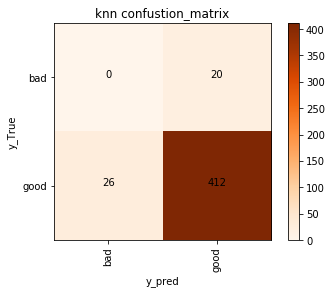

In [32]:
from sklearn.metrics import confusion_matrix
import itertools

knn_confusion = confusion_matrix(y_test,y_pred)

plt.imshow(knn_confusion,interpolation='nearest',cmap=plt.cm.Oranges) 
plt.xlabel('y_pred')
plt.ylabel('y_True')

kind=['bad','good']

tick_marks = np.arange(len(kind))
plt.xticks(tick_marks,kind,rotation=90)
plt.yticks(tick_marks,kind)
plt.colorbar()
plt.title('knn confustion_matrix')
for i,j in itertools.product(range(len(knn_confusion)),range(len(knn_confusion))):
    plt.text(i,j,knn_confusion[j,i],
             horizontalalignment="center")

In [37]:
type(vect)

sklearn.feature_extraction.text.CountVectorizer

# Svm
* list1 model

In [43]:
#支持向量机
from sklearn import svm  
clf = svm.SVC(gamma=0.001, C=100.)


pipe = make_pipeline(vect,clf)
pipe.fit(X_train.cutted_comment, y_train)

#模型评估
y_pred = pipe.predict(X_test.cutted_comment)
from sklearn import metrics
metrics.accuracy_score(y_true = y_test,y_pred = y_pred)




0.9563318777292577

* list2 plot

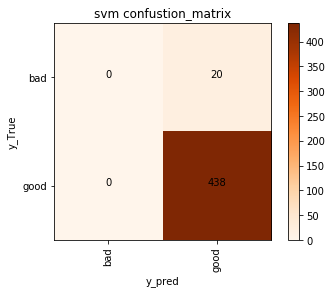

In [44]:
kmv_confusion = confusion_matrix(y_test,y_pred)

plt.imshow(kmv_confusion,interpolation='nearest',cmap=plt.cm.Oranges) 
plt.xlabel('y_pred')
plt.ylabel('y_True')

kind=['bad','good']

tick_marks = np.arange(len(kind))
plt.xticks(tick_marks,kind,rotation=90)
plt.yticks(tick_marks,kind)
plt.colorbar()
plt.title('svm confustion_matrix')
for i,j in itertools.product(range(len(kmv_confusion)),range(len(kmv_confusion))):
    plt.text(i,j,kmv_confusion[j,i],
             horizontalalignment="center")



## 经过对比，我们发现kmv的分类效果最好，将一个评论分类到积极或消极的评论里的正确率达到了97%

# !!!!研究大家评论的话题,利用lda
LDA 假定文档是从主题的混合生成的。这些主题又是由一些单词的特定概率分布而生成的。
所以，我们就需要先确定文档中的全部单词，然后分析这些单词中包含着那些主题，

参考：https://blog.csdn.net/eastmount/article/details/50891162

* list1 计算主题中的top关键词

In [40]:
#如何计算主题的TopN关键词

#LDA算法    
print('LDA:')    
import numpy as np    
import lda    
import lda.datasets    


#term_matrix利用词频矩阵，进行模型的拟合，从而获取到主题词
model = lda.LDA(n_topics=2, n_iter=500, random_state=1)    
model.fit(np.asarray(term_matrix))     # model.fit_transform(X) is also available    
topic_word = model.topic_word_    # model.components_ also works  
  
#输出主题中的TopN关键词  
word = vect.get_feature_names()  
for w in word:  
    print(w)  
print(topic_word[:, :3])  
n = 5    
for i, topic_dist in enumerate(topic_word):    
    topic_words = np.array(word)[np.argsort(topic_dist)][:-(n+1):-1]    
    print(u'*Topic {}\n- {}'.format(i, ' '.join(topic_words)))    
  
  
#文档-主题（Document-Topic）分布    
doc_topic = model.doc_topic_    
print("type(doc_topic): {}".format(type(doc_topic)))    
print("shape: {}".format(doc_topic.shape))

INFO:lda:n_documents: 1372
INFO:lda:vocab_size: 906
INFO:lda:n_words: 14738
INFO:lda:n_topics: 2
INFO:lda:n_iter: 500


LDA:


INFO:lda:<0> log likelihood: -105906
INFO:lda:<10> log likelihood: -95065
INFO:lda:<20> log likelihood: -94446
INFO:lda:<30> log likelihood: -93939
INFO:lda:<40> log likelihood: -93584
INFO:lda:<50> log likelihood: -93199
INFO:lda:<60> log likelihood: -92791
INFO:lda:<70> log likelihood: -92427
INFO:lda:<80> log likelihood: -92236
INFO:lda:<90> log likelihood: -91889
INFO:lda:<100> log likelihood: -91836
INFO:lda:<110> log likelihood: -91735
INFO:lda:<120> log likelihood: -91690
INFO:lda:<130> log likelihood: -91503
INFO:lda:<140> log likelihood: -91541
INFO:lda:<150> log likelihood: -91429
INFO:lda:<160> log likelihood: -91330
INFO:lda:<170> log likelihood: -91319
INFO:lda:<180> log likelihood: -91324
INFO:lda:<190> log likelihood: -91270
INFO:lda:<200> log likelihood: -91187
INFO:lda:<210> log likelihood: -90974
INFO:lda:<220> log likelihood: -91100
INFO:lda:<230> log likelihood: -91158
INFO:lda:<240> log likelihood: -91253
INFO:lda:<250> log likelihood: -91191
INFO:lda:<260> log lik

00
10
100
12
120
15
20
30
40
50
5a
60
nice
ps
wifi
一下
一位
一共
一分钱
一去
一句
一天
一定
一家
一整天
一日
一日游
一条
一条街
一桌
一次
一段
一点
一种
一级
一行
一起
一趟
一路
一路上
一边
七分
七点
万代
三个
三分
三遍
上午
上去
上山
上海
上车
上面
下午
下山
下来
下次
下着雨
下车
下雨
不买
不了
不亏
不会
不停
不到
不厌其烦
不吃
不同
不太
不好
不少
不得不
不必要
不想
不愧
不是
不来
不用
不算
不累
不能
不虚此行
不行
不要
不让
不错
专业
专线
业务
东西
丝毫
两个
两千多年
个人
个赞
中午
中午饭
中国
中餐
中饭
丰富
丰盛
临时
临走
主动
主要
之前
之后
之外
之旅
乘坐
了解
事情
云梯
互动
五星
交通
交通工具
交通费
产品
享受
亲切
亲和力
亲自
人员
人多
人文
人文景观
人流
人美
今天
介绍
仔细
付出
仙女
代步
以为
以前
以后
价格
价钱
休息
优秀
优美
伟大
估计
位置
体会
体力
体贴
体验
作用
佩服
便宜
信息
信赖
值得
停车
偷懒
偷拍
傍晚
充分
充实
充裕
充足
先去
兔头
全团
全家
全景
全程
全程无
全车
全部
全面
公仔
公司
关心
其实
典故
内容
再次
冤枉钱
决定
准备
准时
几个
几乎
几天
几次
出发
出来
出游
出行
出门
分享
分别
分钟
刘倩
刚刚
别人
到位
到处
到达
前一天
加上
包括
匆忙
十人
十分
十分满意
午餐
午饭
单一
卖力
印象
历史
厉害
原来
原理
去过
参加
参团
参观
及时
反复
反应
发了
发源地
发现
发短信
发车
受益匪浅
变脸
口味
古人
只能
叮嘱
可口
可爱
可能
司机
吃饭
吃饱
合理
合适
同学
同行
名字
后山
后来
吴优
吴优人
吴优团
吴导
吴悠
告诉
周到
味道
呼吸
品尝
品质
哈哈哈
哥哥
唯一
喜欢
嗓子
四川
四绝
回去
回来
回程
回答
团友
团友们
团员
团游
团里
团队
团餐
国内
图片
地方
地点
地道
坐船
块钱
基地
基本
堵车
壮观
声音
多年
多次
大大
大家
大巴
大巴车
大概
大熊猫
大门
天下
天公不作美
天师
天气
天然
太棒了
太累
失望
女生
好吃
好听
好多
好好
好玩
好评
妥当


在这里，我们确定出了两个主题，以及这两个主题中出现频率最高的五个关键词，
top0是导游
top1是青城山和都江堰

* list2 应用主题词，找出前10条评论所关注的主题

In [41]:
#应用主题词，我们可以看出每个评论所关注的主题

import numpy as np
import lda
import lda.datasets

model=lda.LDA(n_topics=2,n_iter=500,random_state=1)
model.fit(np.asarray(term_matrix))
topic_word=model.topic_word_

#评论－主题分布

doc_topic=model.doc_topic_
print("type(doc_topic):{}".format(type(doc_topic)))
print("shape:{}".format(doc_topic.shape))

#输出前10条评论最可能的topic

label=[]
for n in range(10):
    topic_most_pr=doc_topic[n].argmax()
    label.append(topic_most_pr)
    
    print("doc:{} topic:{}".format(n,topic_most_pr))


INFO:lda:n_documents: 1372
INFO:lda:vocab_size: 906
INFO:lda:n_words: 14738
INFO:lda:n_topics: 2
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -105906
INFO:lda:<10> log likelihood: -95065
INFO:lda:<20> log likelihood: -94446
INFO:lda:<30> log likelihood: -93939
INFO:lda:<40> log likelihood: -93584
INFO:lda:<50> log likelihood: -93199
INFO:lda:<60> log likelihood: -92791
INFO:lda:<70> log likelihood: -92427
INFO:lda:<80> log likelihood: -92236
INFO:lda:<90> log likelihood: -91889
INFO:lda:<100> log likelihood: -91836
INFO:lda:<110> log likelihood: -91735
INFO:lda:<120> log likelihood: -91690
INFO:lda:<130> log likelihood: -91503
INFO:lda:<140> log likelihood: -91541
INFO:lda:<150> log likelihood: -91429
INFO:lda:<160> log likelihood: -91330
INFO:lda:<170> log likelihood: -91319
INFO:lda:<180> log likelihood: -91324
INFO:lda:<190> log likelihood: -91270
INFO:lda:<200> log likelihood: -91187
INFO:lda:<210> log likelihood: -90974
INFO:lda:<220> log likelihood: -91100
INFO:lda:<230> log

type(doc_topic):<class 'numpy.ndarray'>
shape:(1372, 2)
doc:0 topic:1
doc:1 topic:1
doc:2 topic:1
doc:3 topic:0
doc:4 topic:0
doc:5 topic:0
doc:6 topic:0
doc:7 topic:0
doc:8 topic:1
doc:9 topic:0


从中我们可以看出，第3条评论时关心景点，其他的评论则是关注导游

* list3 一个可视化的描述，看出每条评论的主题分布 

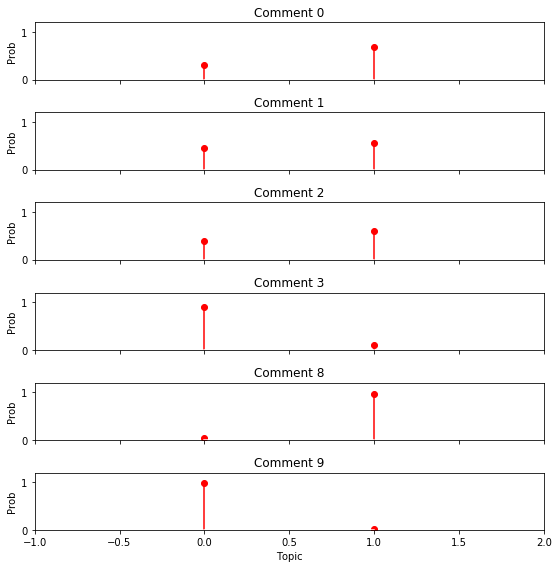

In [42]:
#计算评论主题分布图  
import matplotlib.pyplot as plt    
f,ax= plt.subplots(6, 1, figsize=(8, 8), sharex=True)    
for i, k in enumerate([0, 1, 2, 3, 8, 9]):    
    ax[i].stem(doc_topic[k,:], linefmt='r-',    
                   markerfmt='ro', basefmt='w-')    
    ax[i].set_xlim(-1, 2)     #x坐标下标  
    ax[i].set_ylim(0, 1.2)    #y坐标下标  
    ax[i].set_ylabel("Prob")    
    ax[i].set_title("Comment {}".format(k))    
ax[5].set_xlabel("Topic")  
plt.tight_layout()  
plt.show()    